In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

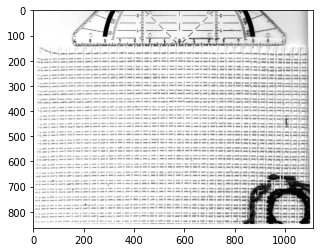

In [46]:
orig_img = cv2.imread('data/textur12.png', 0)
plt.imshow(orig_img, cmap='gray')

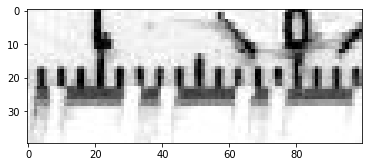

In [47]:
scale_img = orig_img[115:155, 500:600]
plt.imshow(scale_img, cmap='gray')

Text(0.5, 1.0, 'Original image with mm scale')

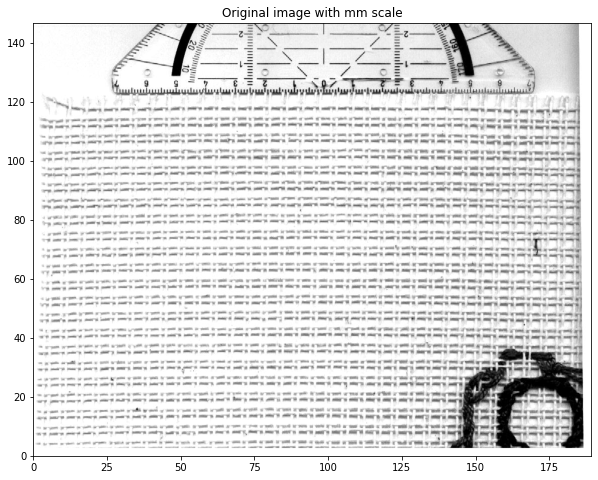

In [48]:
#mm striche zählen -> 17 striche ->17/100mm/px
px_mm = 17/100
x_px = orig_img.shape[1]
y_px = orig_img.shape[0]
x_axis_mm = np.arange(0, x_px)*px_mm
y_axis_mm = np.arange(0, y_px)*px_mm
fig= plt.figure(figsize=(10, 10))
plt.imshow(orig_img, cmap='gray', extent=[x_axis_mm.min(), x_axis_mm.max(),  y_axis_mm.min(), y_axis_mm.max()])
plt.title('Original image with mm scale')

Text(0.5, 1.0, 'structure crop with mm scale')

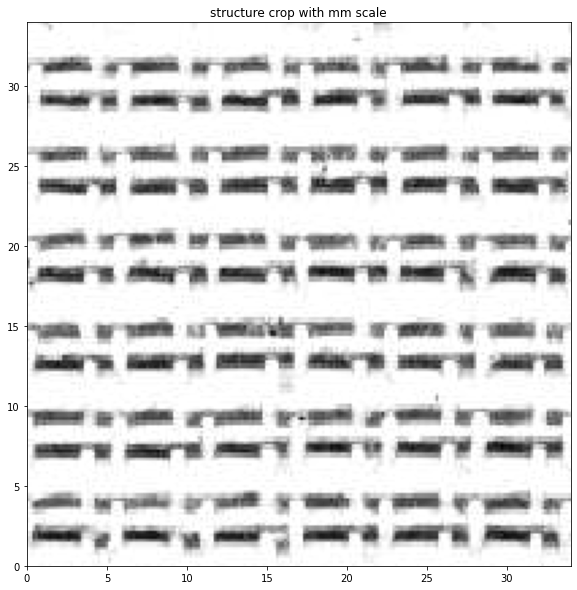

In [49]:
structure = orig_img[400:601, 400:601]
x_px = structure.shape[1]
y_px = structure.shape[0]
x_axis_mm = np.arange(0, x_px)*px_mm
y_axis_mm = np.arange(0, y_px)*px_mm
fig= plt.figure(figsize=(10, 10))
plt.imshow(structure, cmap='gray', extent=[x_axis_mm.min(), x_axis_mm.max(),  y_axis_mm.min(), y_axis_mm.max()])
plt.title('structure crop with mm scale')

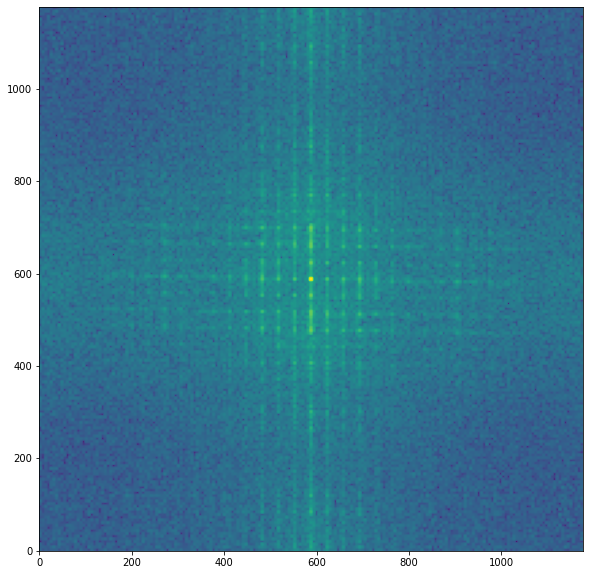

In [50]:
structure_fft = np.fft.fftshift(np.fft.fft2(structure))
u = 1/px_mm
x_frq = structure.shape[1]
y_frq = structure.shape[0]
x_axis_frq = np.arange(0, x_frq)*u
y_axis_frq = np.arange(0, x_frq)*u
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.abs(structure_fft ), norm=LogNorm(vmin=5), extent=[x_axis_frq.min(), x_axis_frq.max(),  y_axis_frq.min(), y_axis_frq.max()])

In [51]:
angle = np.angle(structure_fft)
angle_deg = angle * 180 / np.pi
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(angle, cmap='gray')

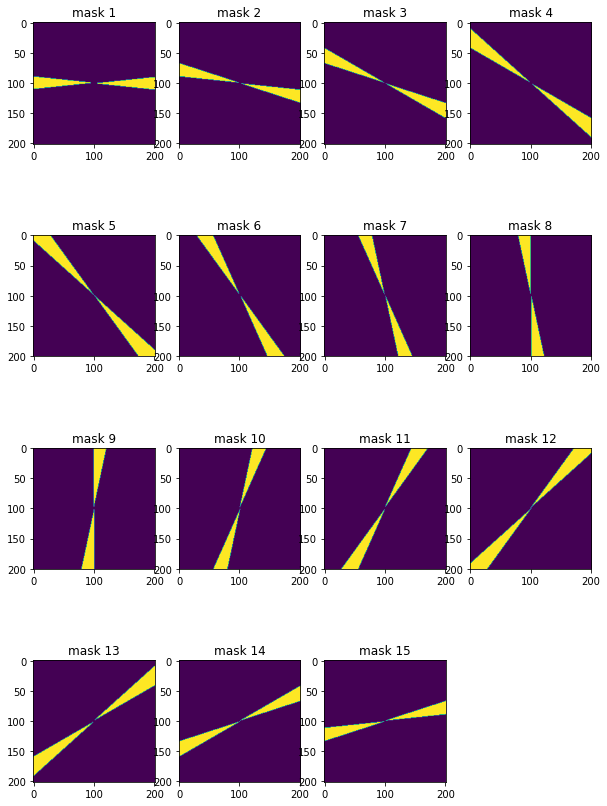

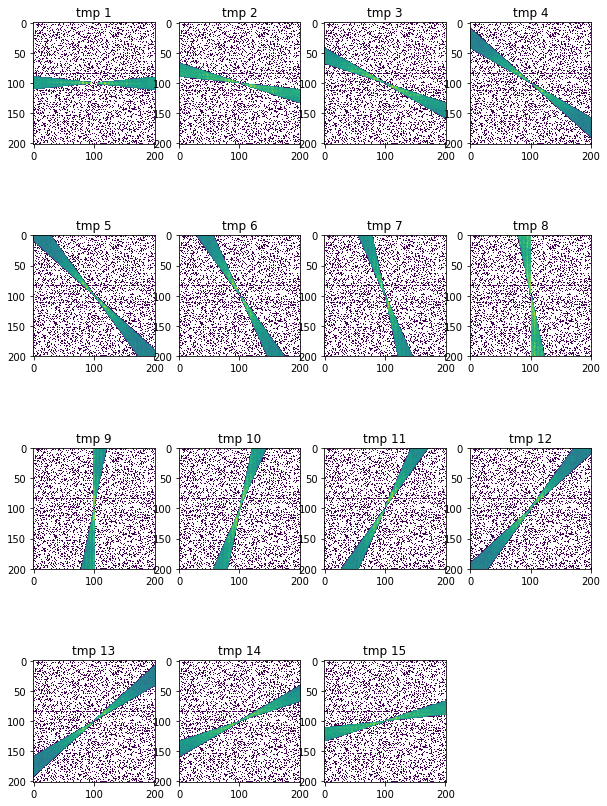

In [52]:
bins = 15
delta_phi = np.pi/bins
shift = delta_phi/2
histo_real = []
histo_imag = []
#x = -angle.shape[0]/2 : 1 : angle.shape[0]/2
start = -angle.shape[0]/2
stop = angle.shape[0]/2
x = np.arange(start = start, stop = stop, step = 1)
X, Y = np.meshgrid(x, x)
fig = plt.figure(figsize=(10, 15))
fig2 = plt.figure(figsize=(10, 15))
masks = []
nrows= int(np.sqrt(bins)+1)

for i in range(bins):
    ax = fig.add_subplot(nrows, nrows, i+1)
    ax2 = fig2.add_subplot(nrows, nrows, i+1)
    phi = np.arctan2(Y, X)
    mask = np.zeros(shape=(phi.shape[0], phi.shape[1]))
    mask = (phi > (i*delta_phi-shift)) & (phi < (i*delta_phi+shift))
    mask = np.rot90(mask, k=2) | mask
    masks.append(mask)
    ax.imshow(mask)
    ax.set_title(f"mask {i+1}")
    tmp = mask*structure_fft
    area = np.count_nonzero(mask)
    
    ax2.imshow(abs(tmp), norm=LogNorm(vmin=5))
    ax2.set_title(f"tmp {i+1}")
    sum = np.sum(np.real(tmp))/area
    histo_real.append(sum)
    sum2 = np.sum(np.imag(tmp))/area
    histo_imag.append(sum2)
    #mask = phi > (i*delta_phi-shift) and phi < (i*delta_phi+shift)

bin_cat = np.arange(0, 180, 180/bins)


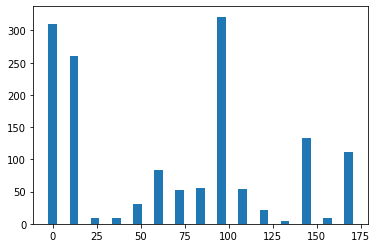

In [53]:


fig3 = plt.bar(bin_cat, np.abs(histo_real), width=5)


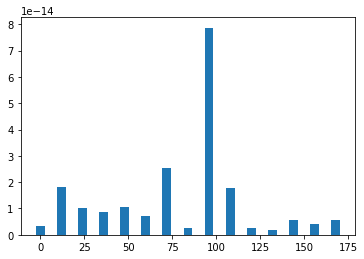

In [54]:


fig3 = plt.bar(bin_cat, np.abs(histo_imag), width=5)

Kreisringe

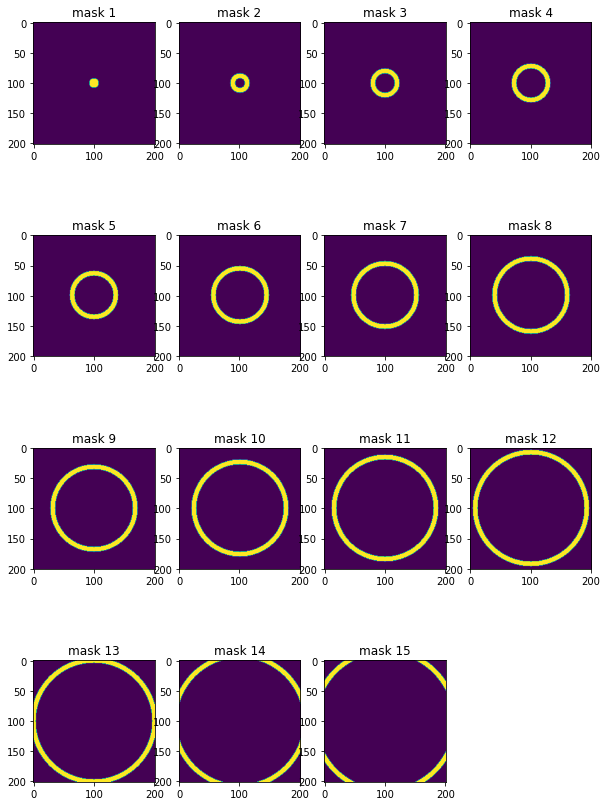

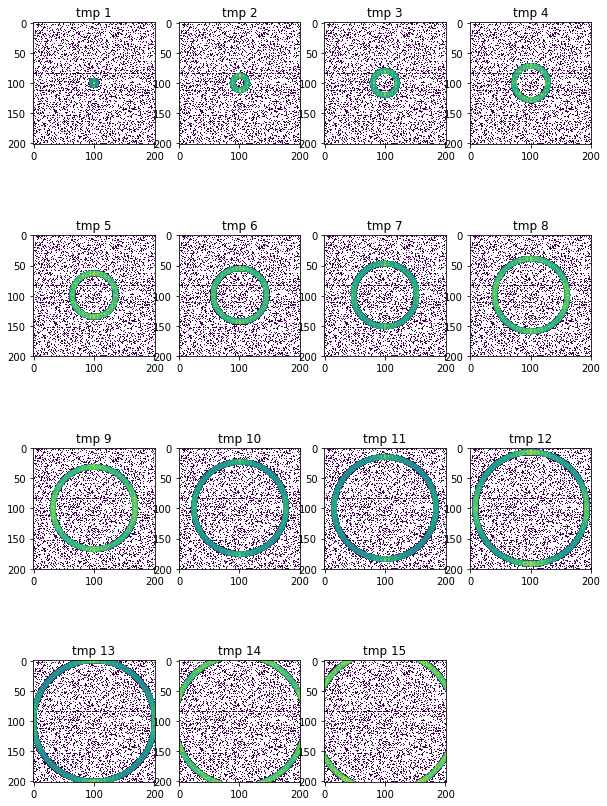

In [55]:
total_rows, total_cols = structure_fft.shape
bins = 15
nrows= int(np.sqrt(bins)+1)
X, Y = np.ogrid[:total_rows, :total_cols]
center = (int(total_cols/2), int(total_rows/2))
#dist_from_center = (X - total_rows)**2 + (Y - total_cols)**2
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
half_height = structure_fft.shape[0]/2
half_width = structure_fft.shape[1]/2
diag = int(np.sqrt(half_height**2+half_width**2))
r_kreisring = int(diag/(2*bins))
r_kreisring = int(structure_fft.shape[0]/(2*bins))
r_kreisring = int(r_kreisring*np.sqrt(2))
radi = []
histo = []
fig = plt.figure(figsize=(10, 15))
fig2 = plt.figure(figsize=(10, 15))
masks = []
for i in range(bins):
    ax = fig.add_subplot(nrows, nrows, i+1)
    ax2 = fig2.add_subplot(nrows, nrows, i+1)
    mask = np.zeros(shape=(phi.shape[0], phi.shape[1]))
    
    if i==0:
        mask = (dist_from_center < (i+1)*r_kreisring)
    else:   
        mask = (dist_from_center > (i+1)*r_kreisring) ^ (dist_from_center > (i)*r_kreisring)
    masks.append(mask)
    radi.append((i+1)*r_kreisring)
    area = np.count_nonzero(mask)
    ax.imshow(mask)
    ax.set_title(f"mask {i+1}")
    tmp = mask*structure_fft
    
    ax2.imshow(abs(tmp), norm=LogNorm(vmin=5))
    ax2.set_title(f"tmp {i+1}")
    sum = np.sum(np.abs(tmp))/area
    histo.append(sum)

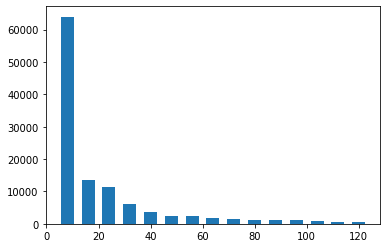

In [56]:

fig3 = plt.bar(radi, histo, width=5)

Aufgabe 2 (phase correlation) 

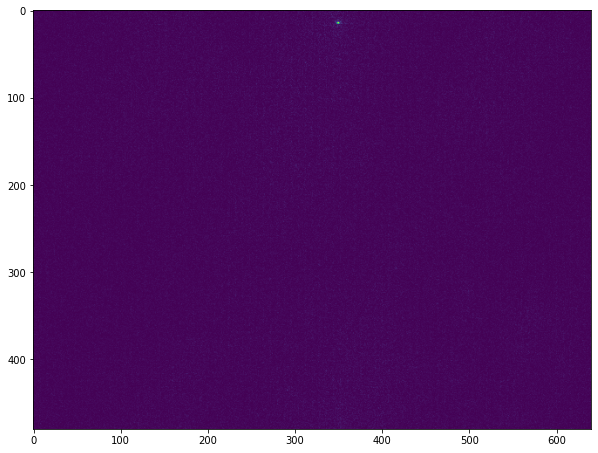

In [57]:
im1 = cv2.imread("data/Uhr_SA2013_05_1{.jpg")
im2 = cv2.imread("data/Uhr_SA2013_05_1w.jpg")
im3 = cv2.imread("data/Uhr_SA2013_05_1x.jpg")

#Compute the DFTs ˆf and ˆg of f and g.
fft1 = np.fft.fft2(im1[:,:,2])
fft2 = np.fft.fft2(im2[:,:,2])
fft3 = np.fft.fft2(im3[:,:,2])
#Multiply ˆf and ˆg and then divide the result by its modulus (pointwise).
#Call the result xi.
t12 = fft1*np.conj(fft3)
xi12 = t12/abs(t12) #ich glaube das ist mit devide by its modulus gemeint
#Apply the inverse Fourier transform to c to obtain an image “approximating”
#delta -x. Apply reflection???. 
cor12 = np.abs(np.fft.ifft2(xi12))
fig = plt.figure(figsize=(10, 10))
plt.imshow(cor12 )

tranlate_y,tranlate_x = np.unravel_index(cor12.argmax(), cor12.shape)


Aufgabe 2 (richtig?) cross covariance

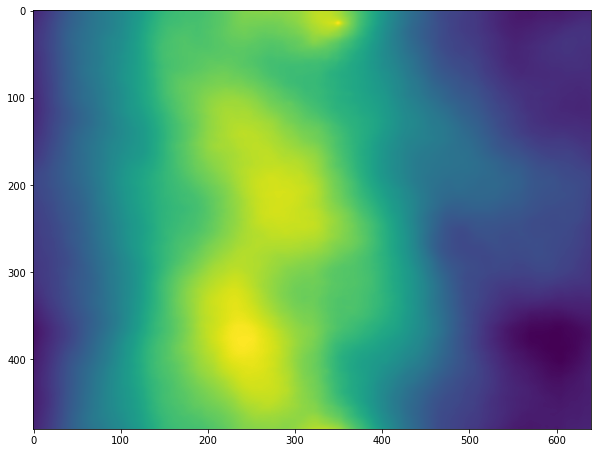

In [58]:
im1 = cv2.imread("data/Uhr_SA2013_05_1{.jpg")
im2 = cv2.imread("data/Uhr_SA2013_05_1w.jpg")
im3 = cv2.imread("data/Uhr_SA2013_05_1x.jpg")

#Compute the DFTs ˆf and ˆg of f and g.
fft1 = np.fft.fft2(im1[:,:,2])
fft2 = np.fft.fft2(im2[:,:,2])
fft3 = np.fft.fft2(im3[:,:,2])
#Multiply ˆf and ˆg and then divide the result by its modulus (pointwise).
#Call the result xi.
xi12 = fft1*np.conj(fft2)
xi13 = fft1*np.conj(fft3)
xi23 = fft2*np.conj(fft3)
#xi12 = t12/abs(t12) #ich glaube das ist mit devide by its modulus gemeint
#Apply the inverse Fourier transform to c to obtain an image “approximating”
#delta -x. Apply reflection???. 
cor12 = np.abs(np.fft.ifft2(xi12))
cor13 = np.abs(np.fft.ifft2(xi13))
cor23 = np.abs(np.fft.ifft2(xi23))
fig = plt.figure(figsize=(10, 10))
plt.imshow(cor13)

translate_y12,translate_x12 = np.unravel_index(cor12.argmax(), cor12.shape)
translate_y13,translate_x13 = np.unravel_index(cor13.argmax(), cor13.shape)
translate_y23,translate_x23 = np.unravel_index(cor23.argmax(), cor23.shape)

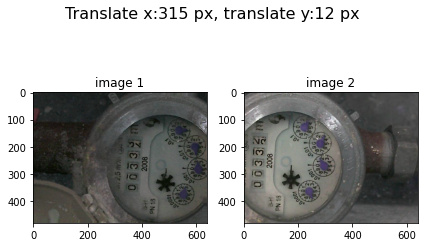

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(im1)
ax.set_title("image 1")
ax = fig.add_subplot(1, 2, 2)
ax.imshow(im2)
ax.set_title("image 2")
fig.suptitle(f"Translate x:{translate_x12} px, translate y:{translate_y12} px", fontsize=16)
fig.tight_layout()

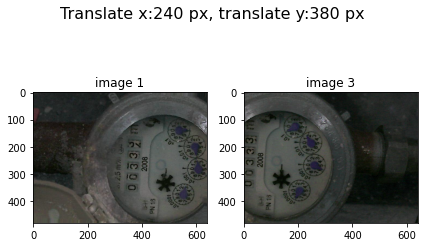

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(im1)
ax.set_title("image 1")
ax = fig.add_subplot(1, 2, 2)
ax.imshow(im3)
ax.set_title("image 3")
fig.suptitle(f"Translate x:{translate_x13} px, translate y:{translate_y13} px", fontsize=16)
fig.tight_layout()

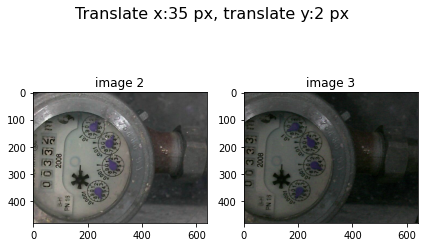

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(im2)
ax.set_title("image 2")
ax = fig.add_subplot(1, 2, 2)
ax.imshow(im3)
ax.set_title("image 3")
fig.suptitle(f"Translate x:{translate_x23} px, translate y:{translate_y23} px", fontsize=16)
fig.tight_layout()

Aufgabe 3 (phase correlation)

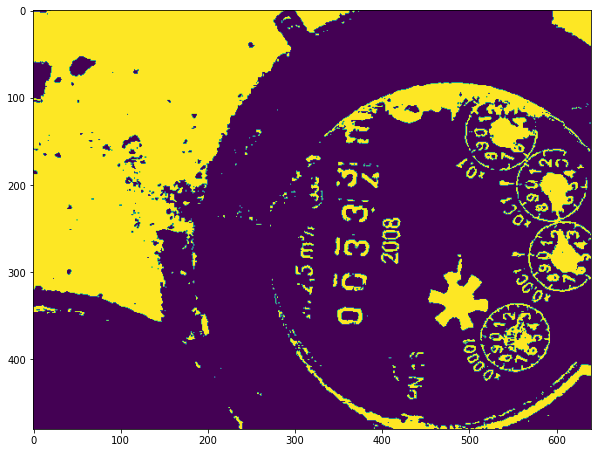

In [62]:
im1_g = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_g = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im3_g = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

th, im1_bin = cv2.threshold(im1_g, 50, 255, cv2.THRESH_BINARY_INV)
th, im2_bin = cv2.threshold(im2_g, 90, 255, cv2.THRESH_BINARY_INV)
th, im3_bin = cv2.threshold(im3_g, 50, 255, cv2.THRESH_BINARY_INV)


fig = plt.figure(figsize=(10, 10))
plt.imshow(im1_bin)

Kreisring template

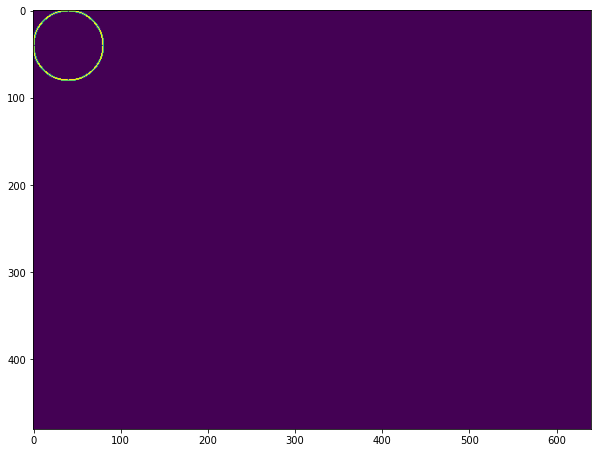

In [63]:
r = 40
sy, sx = im1_bin.shape
x = np.arange(start = -r, stop = sx-r, step = 1)
y = np.arange(start = -r, stop = sy-r, step = 1)
X, Y = np.meshgrid(x, y)
circ = ((X**2+Y**2) < ((r+1)**2)) & ((X**2+Y**2) > ((r-1)**2))

fig = plt.figure(figsize=(10, 10))
plt.imshow(circ)

phase correlation

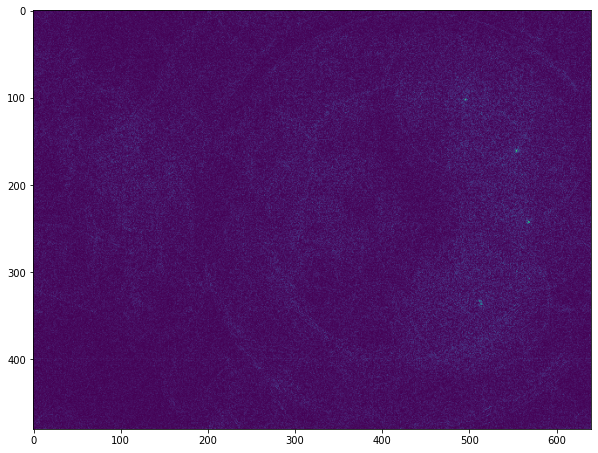

In [64]:
im1_bin_fft = np.fft.fft2(im1_bin)
im2_bin_fft = np.fft.fft2(im2_bin)
im3_bin_fft = np.fft.fft2(im3_bin)
circ_fft = np.fft.fft2(circ)

t1 = im1_bin_fft * np.conj(circ_fft)
t2 = im2_bin_fft * np.conj(circ_fft)
t3 = im3_bin_fft * np.conj(circ_fft)
xi1 = t1/abs(t1)
xi2 = t2/abs(t2)
xi3 = t3/abs(t3)

phase_cor_1 = np.fft.ifft2(xi1)
phase_cor_2 = np.fft.ifft2(xi2)
phase_cor_3 = np.fft.ifft2(xi3)

phase_cor_1_abs = np.abs(phase_cor_1)
phase_cor_2_abs = np.abs(phase_cor_2)
phase_cor_3_abs = np.abs(phase_cor_3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(phase_cor_1_abs)

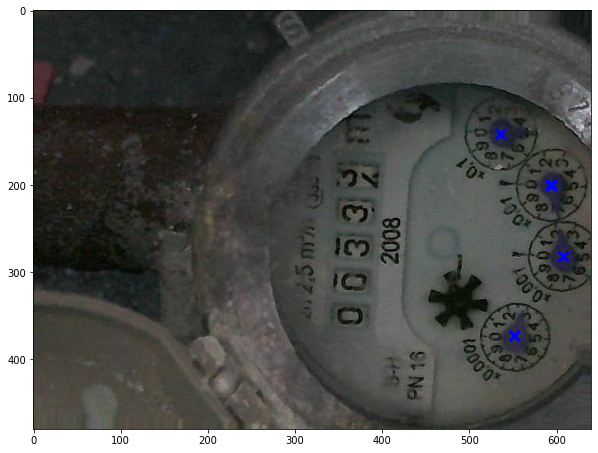

In [65]:
idx = largest_indices(phase_cor_1_abs, 5)
xs = idx[1]+r
ys = idx[0]+r

xs = xs.astype(int)
ys = ys.astype(int)
# xs[0] = 100
# ys[0] = 200
for (xs, ys) in zip(xs, ys): 
    startpoint1 = (xs-5, ys-5)
    endpoint1 =  (xs+5, ys+5)
    startpoint2 = (xs+5, ys-5)
    endpoint2 =  (xs-5, ys+5)

    # print(startpoint1)
    # print(endpoint1)
    # print(startpoint2)
    # print(endpoint2)

    thickness = 2
    cv2.line(im1, pt1 = startpoint1 , pt2 = endpoint1, color=(0, 0, 255), thickness=thickness)
    cv2.line(im1, pt1 = startpoint2 , pt2 = endpoint2, color=(0, 0, 255), thickness=thickness)


fig = plt.figure(figsize=(10, 10))
plt.imshow(im1)

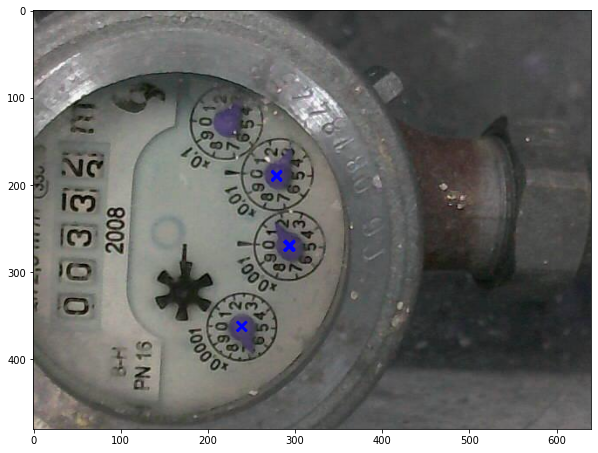

In [66]:
idx = largest_indices(phase_cor_2_abs, 6)
xs = idx[1]+r
ys = idx[0]+r

xs = xs.astype(int)
ys = ys.astype(int)
# xs[0] = 100
# ys[0] = 200
for (xs, ys) in zip(xs, ys): 
    startpoint1 = (xs-5, ys-5)
    endpoint1 =  (xs+5, ys+5)
    startpoint2 = (xs+5, ys-5)
    endpoint2 =  (xs-5, ys+5)

    # print(startpoint1)
    # print(endpoint1)
    # print(startpoint2)
    # print(endpoint2)

    thickness = 2
    cv2.line(im2, pt1 = startpoint1 , pt2 = endpoint1, color=(0, 0, 255), thickness=thickness)
    cv2.line(im2, pt1 = startpoint2 , pt2 = endpoint2, color=(0, 0, 255), thickness=thickness)


fig = plt.figure(figsize=(10, 10))
plt.imshow(im2)

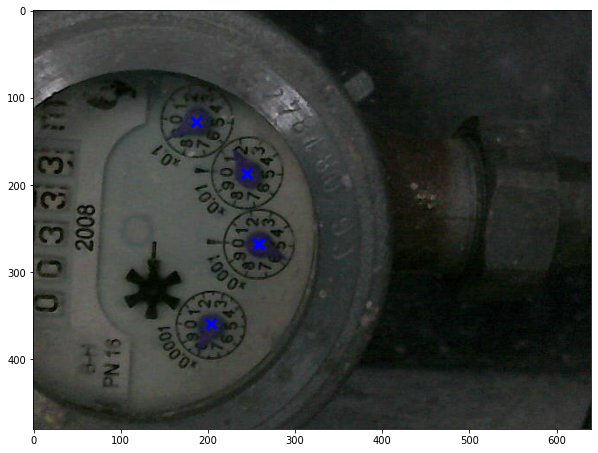

In [67]:
idx = largest_indices(phase_cor_3_abs, 6)
xs = idx[1]+r
ys = idx[0]+r

xs = xs.astype(int)
ys = ys.astype(int)
# xs[0] = 100
# ys[0] = 200
for (xs, ys) in zip(xs, ys): 
    startpoint1 = (xs-5, ys-5)
    endpoint1 =  (xs+5, ys+5)
    startpoint2 = (xs+5, ys-5)
    endpoint2 =  (xs-5, ys+5)

    # print(startpoint1)
    # print(endpoint1)
    # print(startpoint2)
    # print(endpoint2)

    thickness = 2
    cv2.line(im3, pt1 = startpoint1 , pt2 = endpoint1, color=(0, 0, 255), thickness=thickness)
    cv2.line(im3, pt1 = startpoint2 , pt2 = endpoint2, color=(0, 0, 255), thickness=thickness)


fig = plt.figure(figsize=(10, 10))
plt.imshow(im3)